# Esercitazione 4

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Esercizio 2

In questo esercizio si vuole simulare la dinamica di un sistema di 108 particelle di Argon all'equilibrio termodinamico,
nei tre casi di fase solida, liquida e gassosa.

In [2]:
npart = 108

In tutti e tre i casi, il sistema viene preparato inizialmente in una configurazione cristallina, con le molecole tra di loro equispaziate. Di seguito una rappresentazione

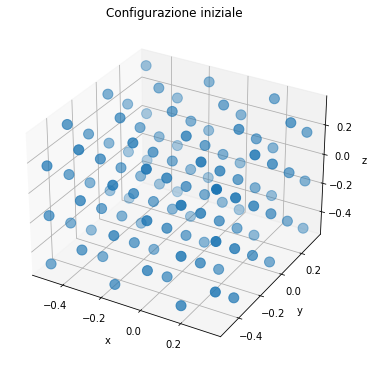

In [3]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig3D = plt.figure()
ax3D = plt.axes(projection='3d')
fig3D.set_figheight(10)

x, y, z = np.loadtxt("./config.in", usecols=(0,1,2), unpack='true')
ax3D.scatter(x, y, z, marker = "o", s = 100);
ax3D.set_xlabel("x"); ax3D.set_ylabel("y"); ax3D.set_zlabel("z")
plt.title("Configurazione iniziale");

### Solido

Prima di prendere le misure, è necessario attendere che il sistema raggiunga lo stato di equilibrio. Questa fase preliminare è detta "equilibrazione". Lasciamo evolvere il sistema per un certo periodo di tempo (3000 passi di simulazione) e confrontiamo la temperatura a cui si assesta la simulazione con quella richiesta di $T = 0.8$

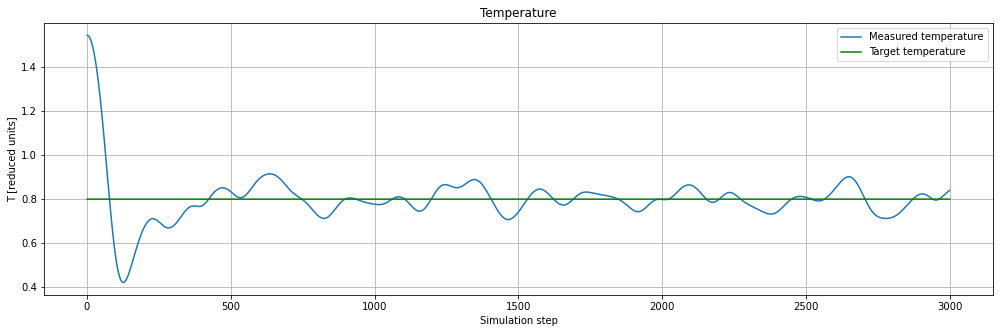

In [4]:
step, tmp_mean = np.loadtxt("./output/output_pretemp_solid.dat", usecols=(0,1), unpack='true')

T_tar = 0.8

plt.figure(figsize=(17,5))
plt.plot(step, tmp_mean, label = "Measured temperature");
plt.plot(step, T_tar*np.ones(step.size), color = 'green', label = "Target temperature");
plt.title("Temperature");
plt.xlabel("Simulation step")
plt.ylabel("T [reduced units]")
plt.legend();
plt.grid();

Si può osservare la rapida descrescita della temperatura, dal valore iniziale $T = 1.543$, verso quello target. È stato necessario effettuare diversi tentativi al fine di trovare la temperatura di partenza adatta.

A partire dall'ultimo passo, il programma procede a calcolare le quantità di interesse (energia totale, cinetica e potenziale, pressione e temperatura) e ne stima il valor medio e l'errore progressivo al procedere della simulazione. Questa volta i dati sono rappresentati in funzione dei blocchi della simulazione e non in funzione del singolo passo. In questo modo è possibile apprezzare la variazione nel tempo della media globale e del suo errore.

La simulazione, in totale, dura 40 blocchi, ciascuno da 1000 step;

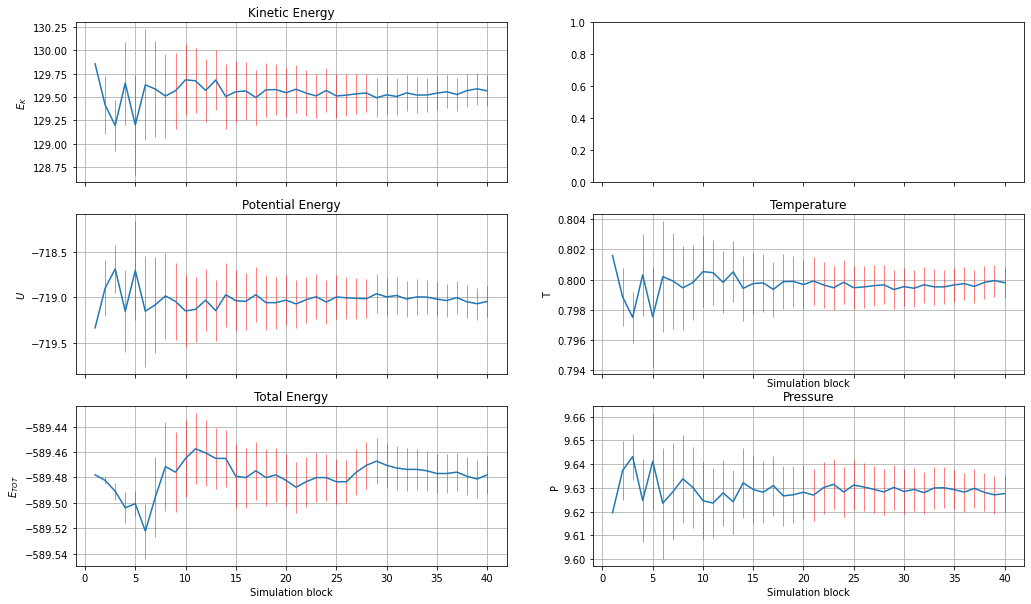

In [6]:
blk, ekin_mean, ekin, ekin_err = np.loadtxt("./output/output_ekin_solid.dat", usecols=(0,1,2,3), unpack='true')
blk, epot_mean, epot, epot_err = np.loadtxt("./output/output_epot_solid.dat", usecols=(0,1,2,3), unpack='true')
blk, etot_mean, etot, etot_err = np.loadtxt("./output/output_etot_solid.dat", usecols=(0,1,2,3), unpack='true')
blk, temp_mean, temp, temp_err = np.loadtxt("./output/output_temp_solid.dat", usecols=(0,1,2,3), unpack='true')
blk, pres_mean, pres, pres_err = np.loadtxt("./output/output_ptot_solid.dat", usecols=(0,1,2,3), unpack='true')

fig, ((ekin_plt, null), (epot_plt, temp_plt), (etot_plt, pres_plt)) = plt.subplots(3,2, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(17)

ekin_plt.errorbar(blk, ekin*npart, yerr = ekin_err*npart, ecolor = 'r', elinewidth=0.5); ekin_plt.title.set_text("Kinetic Energy")
ekin_plt.set_ylabel("$E_K$");
epot_plt.errorbar(blk, epot*npart, yerr = epot_err*npart, ecolor = 'r', elinewidth=0.5); epot_plt.title.set_text("Potential Energy")
epot_plt.set_ylabel("$U$");
etot_plt.errorbar(blk, etot*npart, yerr = etot_err*npart, ecolor = 'r', elinewidth=0.5); etot_plt.title.set_text("Total Energy")
etot_plt.set_xlabel("Simulation block");
etot_plt.set_ylabel("$E_{TOT}$");
temp_plt.errorbar(blk, temp, yerr = temp_err, ecolor = 'r', elinewidth=0.5); temp_plt.title.set_text("Temperature")
temp_plt.set_xlabel("Simulation block");
temp_plt.set_ylabel("T");
pres_plt.errorbar(blk, pres, yerr = pres_err, ecolor = 'r', elinewidth=0.5); pres_plt.title.set_text("Pressure")
pres_plt.set_xlabel("Simulation block");
pres_plt.set_ylabel("P");

etot_plt.grid(); ekin_plt.grid(); epot_plt.grid(); pres_plt.grid(); temp_plt.grid();

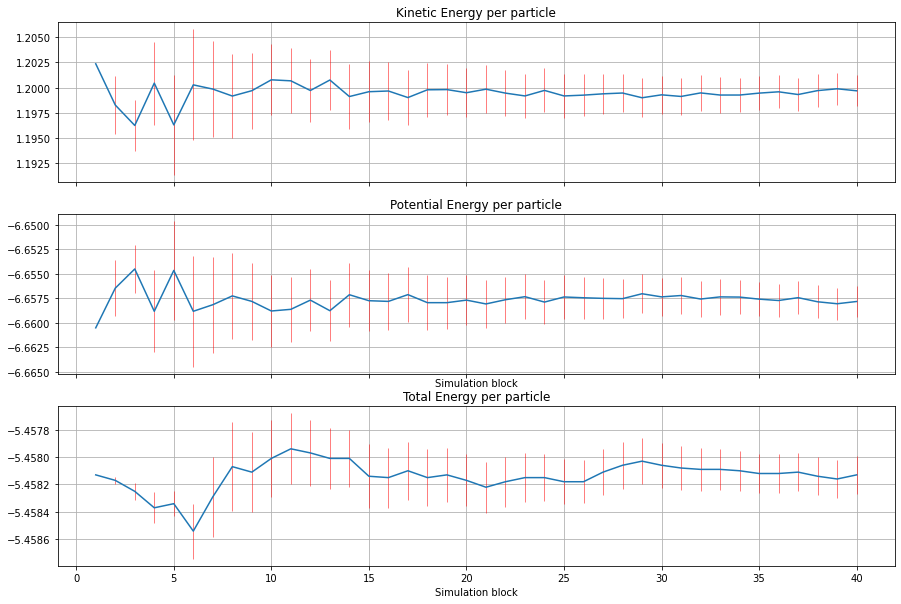

In [7]:
fig2, ((ekinN_plt), (epotN_plt), (etotN_plt)) = plt.subplots(3,1, sharex = True)
fig2.set_figheight(10)
fig2.set_figwidth(15)

ekinN_plt.errorbar(blk, ekin, yerr = ekin_err, ecolor = 'r', elinewidth=0.5); ekinN_plt.title.set_text("Kinetic Energy per particle")
epotN_plt.errorbar(blk, epot, yerr = epot_err, ecolor = 'r', elinewidth=0.5); epotN_plt.title.set_text("Potential Energy per particle")
epotN_plt.set_xlabel("Simulation block");
etotN_plt.errorbar(blk, etot, yerr = etot_err, ecolor = 'r', elinewidth=0.5); etotN_plt.title.set_text("Total Energy per particle")
etotN_plt.set_xlabel("Simulation block");

ekinN_plt.grid(); etotN_plt.grid(); epotN_plt.grid();

### Liquido

Di nuovo è necessario trovare una buona temperatura di partenza per la simulazione, affinché il sistema raggiunga l'equilibrio in $T = 1.1$.

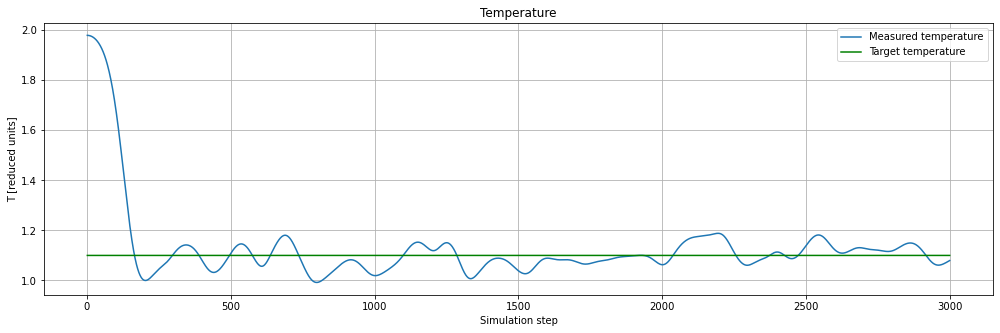

In [8]:
step, tmp_mean = np.loadtxt("./output/output_pretemp_liquid.dat", usecols=(0,1), unpack='true')

T_tar = 1.1

plt.figure(figsize=(17,5))
plt.plot(step, tmp_mean, label = "Measured temperature");
plt.plot(step, T_tar*np.ones(step.size), color = 'green', label = "Target temperature");
plt.title("Temperature");
plt.xlabel("Simulation step")
plt.ylabel("T [reduced units]")
plt.legend();
plt.grid();

La temperatura di partenza questa volta è stata impostata a $T = 1.979$.

Esattamente come nel caso precedente, lasciamo che il sistema evolva dal termine di questa fase preliminare e calcoliamo le osservabili, prima quelle globali:

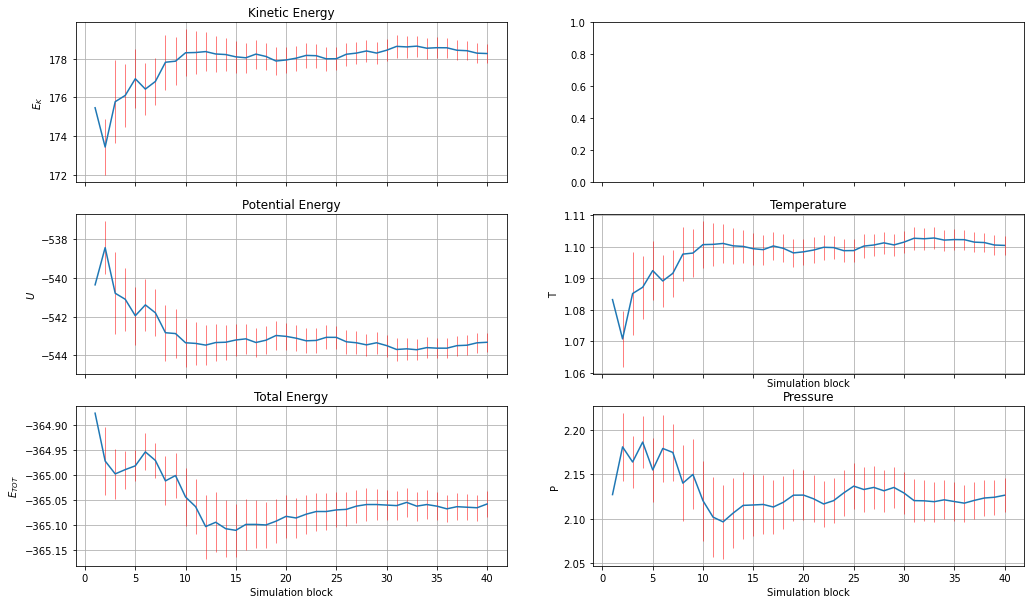

In [9]:
blk, ekin_mean, ekin, ekin_err = np.loadtxt("./output/output_ekin_liquid.dat", usecols=(0,1,2,3), unpack='true')
blk, epot_mean, epot, epot_err = np.loadtxt("./output/output_epot_liquid.dat", usecols=(0,1,2,3), unpack='true')
blk, etot_mean, etot, etot_err = np.loadtxt("./output/output_etot_liquid.dat", usecols=(0,1,2,3), unpack='true')
blk, temp_mean, temp, temp_err = np.loadtxt("./output/output_temp_liquid.dat", usecols=(0,1,2,3), unpack='true')
blk, pres_mean, pres, pres_err = np.loadtxt("./output/output_ptot_liquid.dat", usecols=(0,1,2,3), unpack='true')

fig, ((ekin_plt, null), (epot_plt, temp_plt), (etot_plt, pres_plt)) = plt.subplots(3,2, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(17)

ekin_plt.errorbar(blk, ekin*npart, yerr = ekin_err*npart, ecolor = 'r', elinewidth=0.5); ekin_plt.title.set_text("Kinetic Energy")
ekin_plt.set_ylabel("$E_K$");
epot_plt.errorbar(blk, epot*npart, yerr = epot_err*npart, ecolor = 'r', elinewidth=0.5); epot_plt.title.set_text("Potential Energy")
epot_plt.set_ylabel("$U$");
etot_plt.errorbar(blk, etot*npart, yerr = etot_err*npart, ecolor = 'r', elinewidth=0.5); etot_plt.title.set_text("Total Energy")
etot_plt.set_xlabel("Simulation block");
etot_plt.set_ylabel("$E_{TOT}$");
temp_plt.errorbar(blk, temp, yerr = temp_err, ecolor = 'r', elinewidth=0.5); temp_plt.title.set_text("Temperature")
temp_plt.set_xlabel("Simulation block");
temp_plt.set_ylabel("T");
pres_plt.errorbar(blk, pres, yerr = pres_err, ecolor = 'r', elinewidth=0.5); pres_plt.title.set_text("Pressure")
pres_plt.set_xlabel("Simulation block");
pres_plt.set_ylabel("P");

ekin_plt.grid(); etot_plt.grid(); epot_plt.grid(); pres_plt.grid(); temp_plt.grid();

In seguito quelle relative alle singole particelle

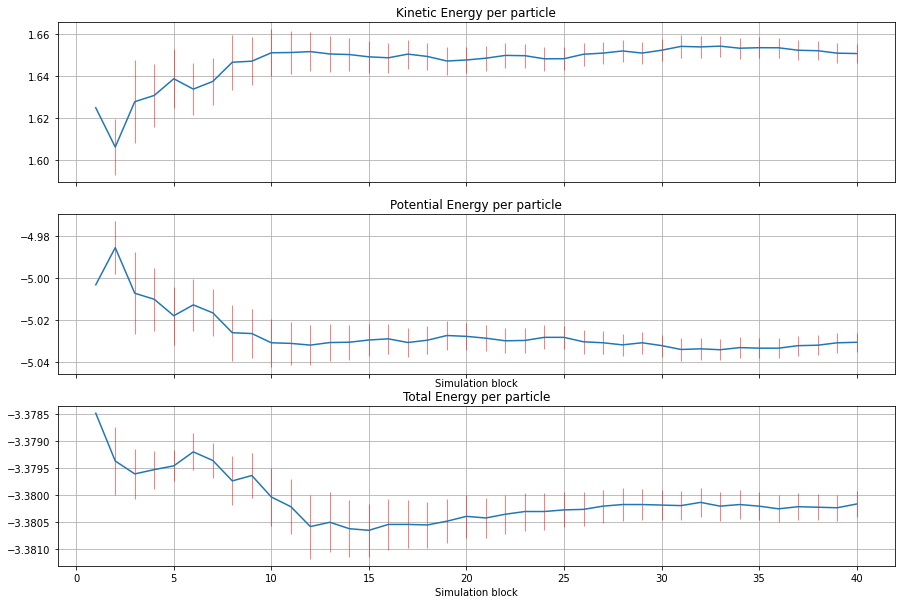

In [10]:
fig2, ((ekinN_plt), (epotN_plt), (etotN_plt)) = plt.subplots(3,1, sharex = True)
fig2.set_figheight(10)
fig2.set_figwidth(15)

ekinN_plt.errorbar(blk, ekin, yerr = ekin_err, ecolor = 'r', elinewidth=0.5); ekinN_plt.title.set_text("Kinetic Energy per particle")
epotN_plt.errorbar(blk, epot, yerr = epot_err, ecolor = 'r', elinewidth=0.5); epotN_plt.title.set_text("Potential Energy per particle")
epotN_plt.set_xlabel("Simulation block");
etotN_plt.errorbar(blk, etot, yerr = etot_err, ecolor = 'r', elinewidth=0.5); etotN_plt.title.set_text("Total Energy per particle")
etotN_plt.set_xlabel("Simulation block");

ekinN_plt.grid(); epotN_plt.grid(); etotN_plt.grid();

### Gas

La temperatura a cui si vuole effettuare la simulazione è $T = 1.2$, nella quale l'argon è allo stato gassoso. Effettuiamo l'equilibrizzazione.

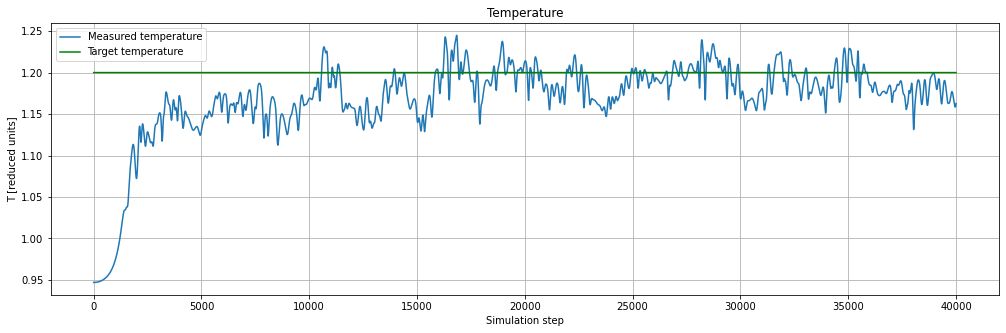

In [11]:
step, tmp_mean = np.loadtxt("./output/output_pretemp_gas.dat", usecols=(0,1), unpack='true')

T_tar = 1.2

plt.figure(figsize=(17,5))
plt.subplot()
plt.plot(step, tmp_mean, label = "Measured temperature");
plt.plot(step, T_tar*np.ones(step.size), color = 'green', label = "Target temperature");
plt.title("Temperature");
plt.xlabel("Simulation step")
plt.ylabel("T [reduced units]")
plt.legend();
plt.grid()

Per il caso gassoso, la temperatura iniziale è stata cercata al di sotto di quella desiderata. In seguito a numerosi tentativi, la temperatura di partenza è stata trovata a $T = 0.947$. A differenza della simulazione per la fase solida e per quella liquida, la temperatura ora tende a salire, prima di raggiungere l'equilibrio.

Data l'elevata dispersione dei dati e la difficoltà nel rilevare l'effettiva conclusione della fase di equilibrazione, si è scelto di aumentare il numero di step preliminari a 40000. Inoltre, per il proseguimento della simulazione, il numero di passi per blocco è stato incrementato da 1000 a 2500.

Ora mostriamo i grafici delle osservabili

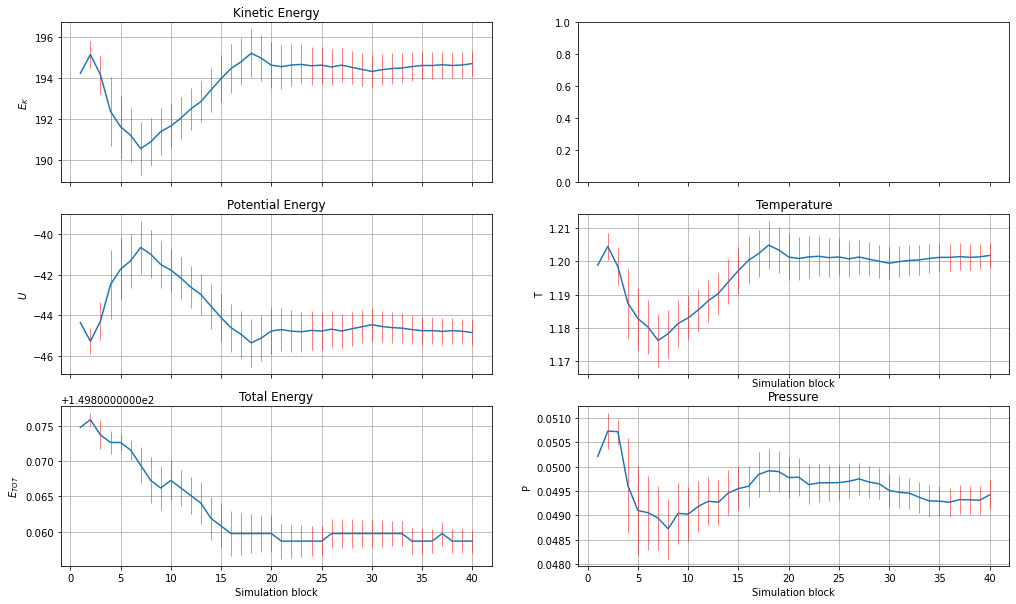

In [12]:
blk, ekin_mean, ekin, ekin_err = np.loadtxt("./output/output_ekin_gas.dat", usecols=(0,1,2,3), unpack='true')
blk, epot_mean, epot, epot_err = np.loadtxt("./output/output_epot_gas.dat", usecols=(0,1,2,3), unpack='true')
blk, etot_mean, etot, etot_err = np.loadtxt("./output/output_etot_gas.dat", usecols=(0,1,2,3), unpack='true')
blk, temp_mean, temp, temp_err = np.loadtxt("./output/output_temp_gas.dat", usecols=(0,1,2,3), unpack='true')
blk, pres_mean, pres, pres_err = np.loadtxt("./output/output_ptot_gas.dat", usecols=(0,1,2,3), unpack='true')

fig, ((ekin_plt, null), (epot_plt, temp_plt), (etot_plt, pres_plt)) = plt.subplots(3,2, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(17)

ekin_plt.errorbar(blk, ekin*npart, yerr = ekin_err*npart, ecolor = 'r', elinewidth=0.5); ekin_plt.title.set_text("Kinetic Energy")
ekin_plt.grid()
ekin_plt.set_ylabel("$E_K$");
epot_plt.errorbar(blk, epot*npart, yerr = epot_err*npart, ecolor = 'r', elinewidth=0.5); epot_plt.title.set_text("Potential Energy")
epot_plt.grid()
epot_plt.set_ylabel("$U$");
etot_plt.errorbar(blk, etot*npart, yerr = etot_err*npart, ecolor = 'r', elinewidth=0.5); etot_plt.title.set_text("Total Energy")
etot_plt.grid()
etot_plt.set_xlabel("Simulation block");
etot_plt.set_ylabel("$E_{TOT}$");
temp_plt.errorbar(blk, temp, yerr = temp_err, ecolor = 'r', elinewidth=0.5, ); temp_plt.title.set_text("Temperature")
temp_plt.grid()
temp_plt.set_xlabel("Simulation block");
temp_plt.set_ylabel("T");
pres_plt.errorbar(blk, pres, yerr = pres_err, ecolor = 'r', elinewidth=0.5); pres_plt.title.set_text("Pressure")
pres_plt.grid()
pres_plt.set_xlabel("Simulation block");
pres_plt.set_ylabel("P");

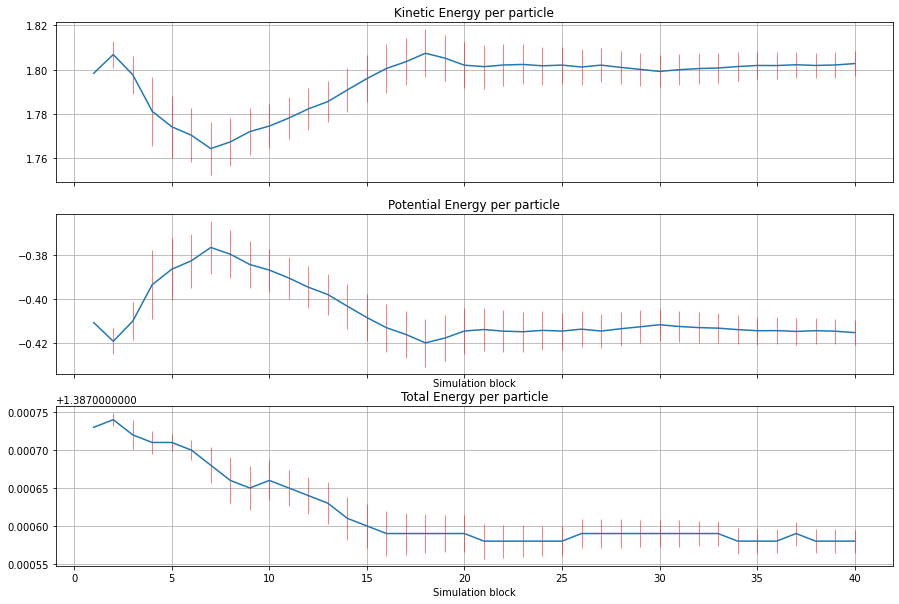

In [13]:
fig2, ((ekinN_plt), (epotN_plt), (etotN_plt)) = plt.subplots(3,1, sharex = True)
fig2.set_figheight(10)
fig2.set_figwidth(15)

ekinN_plt.errorbar(blk, ekin, yerr = ekin_err, ecolor = 'r', elinewidth=0.5); ekinN_plt.title.set_text("Kinetic Energy per particle")
epotN_plt.errorbar(blk, epot, yerr = epot_err, ecolor = 'r', elinewidth=0.5); epotN_plt.title.set_text("Potential Energy per particle")
epotN_plt.set_xlabel("Simulation block");
etotN_plt.errorbar(blk, etot, yerr = etot_err, ecolor = 'r', elinewidth=0.5); etotN_plt.title.set_text("Total Energy per particle")
etotN_plt.set_xlabel("Simulation block");

ekinN_plt.grid(); epotN_plt.grid(); etotN_plt.grid();

## Commenti

Il programma di dinamica molecolare calcola la nuova posizione delle molecole risolvendo le equazioni del moto. Il risolutore delle equazioni, _verlet_, ha la tendenza a conservare l'anargia totale. Nei grafici dell'energia totale dei tre casi è possibile apprezzare questo.

Una nota che è necessario scrivere è che viene trascurata l'interazione tra molecole molto distanti tra di loro, ossia che si trovano oltre una certa distanza (il raggio di cut-off). I valori di tale raggio è, per i vari casi:
* Fase solida: $r_c = 2.2$;
* fase liquida $r_c = 2.5$;
* fase gassosa $r_c = 5.0$.

Nell'esercitazione 6, con l'introduzione della funzione di distribuzione radiale, verrà stimato il contributo dovuto alle "code" di potenziale che sono state trascurate.